In [1]:
import cv2 as cv
import numpy as np

In [2]:
net = cv.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
print(output_layers)
colors = np.random.uniform(0, 255, size=(len(classes), 3))

['yolo_82', 'yolo_94', 'yolo_106']


In [3]:
# Loading image
img = cv.imread("person.jpg")
img = cv.resize(img, None, fx=0.6, fy=0.6)
height, width, channels = img.shape

In [4]:
blob = cv.dnn.blobFromImage(img, 0.00392, (512, 512), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [5]:
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [6]:
indexes = cv.dnn.NMSBoxes(boxes, confidences, 0.3, 0.1)

In [7]:
font = cv.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv.putText(img, label, (x, y + 30), font, 3, color, 3)
#cv.imshow("Image", img)
cv.imwrite("Image.png",img)
#cv.waitKey(0)
#cv.destroyAllWindows()

True

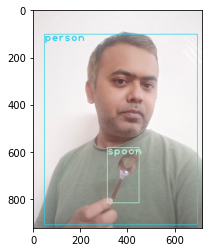

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('Image.png')
imgplot = plt.imshow(img)
plt.show()